In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import os
from SGD.dynamics import Trainer
from SGD.data import DataGenerator
from SGD.plot_config import *
from SGD.utils import initialize_weights , velocity_field
from SGD.functions import activations
import matplotlib.pyplot as plt
import pickle   
apply_general_styles()

# Many runs SGD

In [71]:
# Fixed parameters
d = 300
alpha = 1200.0
k = 3
teacher = 'He3'
student = 'tanh'
loss = 'corr'
# Define the parameter lists
# p_values = [0.0 , 2.0, 4.0, 8.0 ,16.0 ,32.0]
p=0.8

lr_values = [4.0]

k0_values = [1.0,1.5,2.0,2.5,3.0]
# Directory to load data from
logs_dir = "../logs"

# Loop over all combinations of parameters
data = {}
# for p in p_values:
for k0 in k0_values:
    data[k0] = {}
    for lr in lr_values:
        # Construct the filename 
        filename = f"test_d{d}_alpha{alpha}_p{p}_lr{lr}_student{student}_teacher{teacher}_k{k}_loss{loss}_k0{k0}.pkl"
        filepath = os.path.join(logs_dir, filename)
        print(f"Loading {filepath}")
        # Load the data using pickle
        with open(filepath, 'rb') as f:
            results = pickle.load(f)
        data[k0][lr] = results
        # print(f"Loaded data for p={p}, lr={lr}: keys = {list(results.keys())}")

N_walkers = results['params']['N_walkers']

Loading ../logs\test_d300_alpha1200.0_p0.8_lr4.0_studenttanh_teacherHe3_k3_losscorr_k01.0.pkl
Loading ../logs\test_d300_alpha1200.0_p0.8_lr4.0_studenttanh_teacherHe3_k3_losscorr_k01.5.pkl
Loading ../logs\test_d300_alpha1200.0_p0.8_lr4.0_studenttanh_teacherHe3_k3_losscorr_k02.0.pkl
Loading ../logs\test_d300_alpha1200.0_p0.8_lr4.0_studenttanh_teacherHe3_k3_losscorr_k02.5.pkl
Loading ../logs\test_d300_alpha1200.0_p0.8_lr4.0_studenttanh_teacherHe3_k3_losscorr_k03.0.pkl


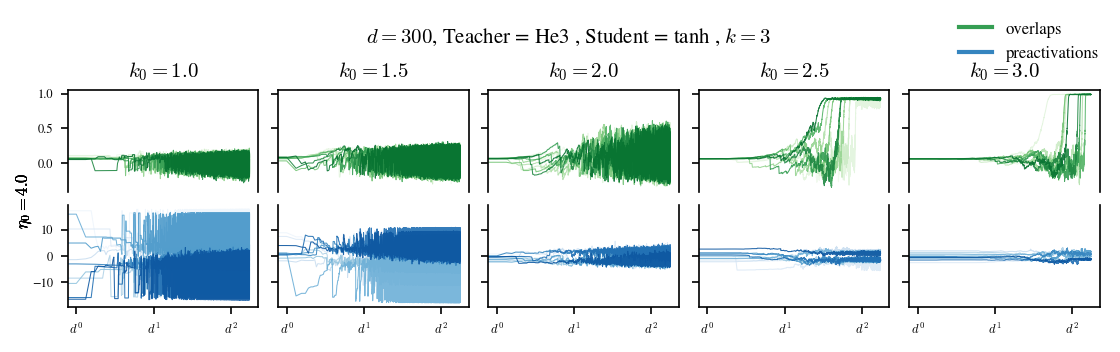

In [75]:
from matplotlib.lines import Line2D

ncols = len(k0_values)
nrows = 2*len(lr_values)

width = double_w
figsize = (width, width * 0.15* nrows)
col = pc_colors[0]
cols_map = [plt.get_cmap(pc_cmaps[-1])(np.linspace(0.05, 0.85,N_walkers)),
            plt.get_cmap(pc_cmaps[-2])(np.linspace(0.05, 0.85,N_walkers))]



off = 0.2
f_off = 0.2
dx = 2*(1-off)/nrows
x_p = np.linspace(f_off*off + dx/2 , 1-(1-f_off)*off,nrows//2)[::-1]

xtk = [d**i for i in range(k)]
xlb = [rf'$d^{i}$' for i in range(k)]

set_font_sizes(conf='tight')
fig , axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, layout='constrained', sharex=True,sharey='row')

for i_p, k0 in enumerate(k0_values):
    for i_lr, lr in enumerate(lr_values):
        fig.text(-0.01,x_p[i_lr],rf'$\eta_0 = {lr}$',rotation=90,va='center')
        for i , key in enumerate(['overlaps','preactivations']):
            ax = axes[i_lr*2 + i,i_p ]
            # ax.grid(ls='--',c='k',lw=0.3,alpha=0.3)
#             if i_lr > 0 : ax.set_yticks([])
            if i_lr == 0 and i == 0: ax.set_title(fr'$k_0 ={k0}$')
            # if 2*i_lr + i == nrows -1 : ax.set_xlabel(r'SGD steps')
            if i == 0: 
                ax.spines['bottom'].set_visible(False)
                ax.spines[['top','right']].set_visible(True)
                ax.xaxis.set_visible(False)
#                 # ax.set_ylim(-0.1,0.1)
#                 yticks = [i/np.sqrt(d) for i in range(0,3)]
#                 yticks_lab = [r'$0$']+[fr'${i}/\sqrt{{d}}$' for i in range(1,3)]
#                 # ax.set_yticks(yticks,yticks_lab)
            else:
                ax.spines['right'].set_visible(True)
#                 # ax.set_ylim(-3,3)
            times = data[k0][lr]['times']
            x = -data[k0][lr][key]
#             # ax.plot(times,np.mean(np.abs(x),axis=1),color=cols_map[i][w],lw=0.5,alpha=0.9)
            for w in range(N_walkers):
                ax.plot(times,x[:,w],color=cols_map[i][w],lw=0.5,alpha=0.9)
#             # ax.axhline(0,ls='--',lw=1,c='k')
#             # ax.set_xlim(left=0)
            ax.set_xscale('log')
            ax.set_xticks(xtk,xlb)
            
#             # Custom legend with green and blue lines for 'overlap' and 'preactivations'

custom_lines = [
    Line2D([0], [0], color=cols_map[0][-3], lw=2, label='overlaps'),
    Line2D([0], [0], color=cols_map[1][-3], lw=2, label='preactivations')
]

fig.legend(handles=custom_lines, loc='upper left', bbox_to_anchor=(0.85, 1.04), frameon=False, ncols=1,fontsize=FONTSIZES['s'])

title = fr" $d = {d}$, Teacher = {teacher} , Student = {student} , $k = {k}$"
fig.suptitle(title, fontsize=FONTSIZES['m'])
fig.savefig(f'../logs/Test_p_interpolate__p{p}_sgd_d{d}_alpha{alpha}_k{k}_teacher{teacher}_student{student}.png', dpi=300, bbox_inches='tight')

In [224]:
tprints = np.unique(np.logspace(0,np.log10(100000),50).astype(int))
print(tprints)

3 in tprints

[     1      2      3      4      5      6      8     10     13     16
     21     26     33     42     54     68     86    109    138    175
    222    281    355    449    568    719    910   1151   1456   1842
   2329   2947   3727   4714   5963   7543   9540  12067  15264  19306
  24420  30888  39069  49417  62505  79060 100000]


True

# ODE plots

In [64]:
params = {
    'd': 10000,
    'k': 3,
    'tau': 0.0001,
    'teacher': 'He3',
    'student': 'tanh',
    'loss': 'corr',
    'c': 0.15 ,#0.0625, #0.15 (he3-tanh)
    'scale': 'log',
    'h_star': 2.0,
}

d = params['d']
k = params['k']
tau = params['tau']
teacher = params['teacher']
student = params['student']
h_star = params['h_star']


m0 = 1.0/np.sqrt(d)
s_base = np.linspace(0,k,100)



ps = [0.0 ,2.0,4.0,8.0,16.0,32.0]#[:2]
ks = np.linspace(1,3,9)#[1,2,3]
p0 = 0.8

N_walkers = 10

data = {}
for k0 in ks:
    params['p'] = p0 * d**(-0.5*(k0-1))
    print(params['p'])
    data[k0] = {
        'iters':[]
    }
    nsave=0
    while nsave < N_walkers: 
        # Initial conditions
        # m0 = np.abs(np.random.normal(loc=0.0,scale=1/np.sqrt(d)))
        h0 = np.random.normal(loc=0.0, scale=1.0)
        params['h_star'] = np.random.normal(loc=0.0, scale=1.0)
        state0 = [m0, h0]
        solver = solve_ivp(velocity_field, [s_base[0], s_base[-1]],state0, t_eval=s_base, args=(params,), method='Radau')
        solution = solver.y.T
        s = solver.t
        if solution[-1,0] < 1.5:
            data[k0]['iters'].append([s,solution])
            nsave += 1
        print(solver.message)


0.8
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
0.2529822128134704
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver 

In [344]:
solution[-1,0]

np.float64(0.05001468018984176)

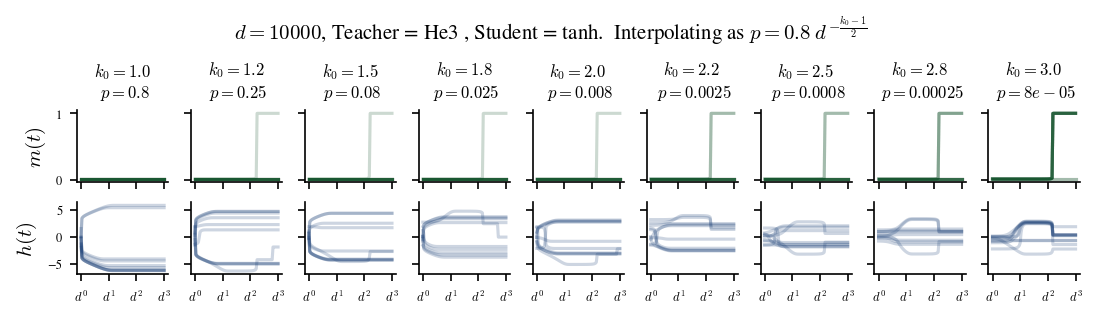

In [69]:
ncols = len(ks)
nrows = 2

width = double_w
figsize = (width, width * 0.14* nrows)
col = pc_colors[0]
cols_map = [plt.get_cmap(pc_cmaps[-1])(np.linspace(0.05, 1,N_walkers)),
            plt.get_cmap(pc_cmaps[-2])(np.linspace(0.05, 1,N_walkers))]
set_font_sizes(conf='tight')
xtk = [i for i in range(k+1)]
xlb = [fr'$d^{i}$' for i in range(k+1)]

fig , axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, layout='constrained', sharex=True,sharey='row')

# for ip , p in enumerate(ps):
for ik , k0 in enumerate(ks):
    for i , lb in enumerate([r'$m(t)$',r'$h(t)$']):
        ax = axes[i,ik]
        ax.set_xticks(xtk,xlb)
        if i == 0: ax.set_title(rf'$k_0 = {k0:.2}$ ' + f'\n'+  rf' $p = {p0 * d**(-0.5*(k0-1)):.2}$',fontsize=FONTSIZES['s'])
        if ik == 0: ax.set_ylabel(lb)
        cols = cols_map[i]
        for w in range(N_walkers):
            s , x = data[k0]['iters'][w]
            ax.plot(s,x[:,i],color=cols[-1],lw=1.5,alpha=0.2)
        # if ip == 0 and i == 1 :
        # if i == 1: ax.axhline(vals[ip],c='saddlebrown',ls='--',lw=1,alpha=0.9,label=r'$\dot{h} = 0 \; |\; m = d^{-1/2}$')
        # if ip == ncols-1 and i == 1 : ax.legend(frameon=False,fontsize=FONTSIZES['xs'])
            


title = fr" $d = {d}$, Teacher = {teacher} , Student = {student}. "+r" Interpolating as $p = 0.8\; d^{-\frac{k_0-1}{2}}$"
fig.suptitle(title, fontsize=FONTSIZES['m'])
fig.savefig(f'../logs/interpolate_d{d}_k{k}_teacher_{teacher}_student{student}.png', dpi=300, bbox_inches='tight')

In [189]:
vals

[np.float64(-9.170746987622949e-05),
 np.float64(-0.0005407459539454647),
 np.float64(-0.0006947548923944558),
 np.float64(-0.0007898798772438317),
 np.float64(-0.0008048461611484051),
 np.float64(-0.0007038998038183929)]

# Vector fields

In [97]:
params = {
    'd': 2000,
    'k': 5,
    'tau': 0.00001,
    'teacher': 'He5',
    'student': 'tanh',
    'loss': 'corr',
    'c': 0.0625,
    'scale': 'linear',
    'h_star': 2.0,
}

d = params['d']
k = params['k']
tau = params['tau']
teacher = params['teacher']
student = params['student']
h_star = params['h_star']


# Create a grid of points
m = np.linspace(-1, 1, 200)[1:-1]
h = np.linspace(-3, 3, 200)
M, H = np.meshgrid(m, h)

ps = [0.0 ,0.05 , 0.1]

N_walkers = 7

data = {}
for p in ps:
    params['p'] = p *d**(-0.5*(k-1))
    print(params['p'])
    # Compute the velocity field at each point
    U, V = velocity_field(0,[M, H] , params)
    data[p] = [U,V]


0.0
1.25e-08
2.5e-08


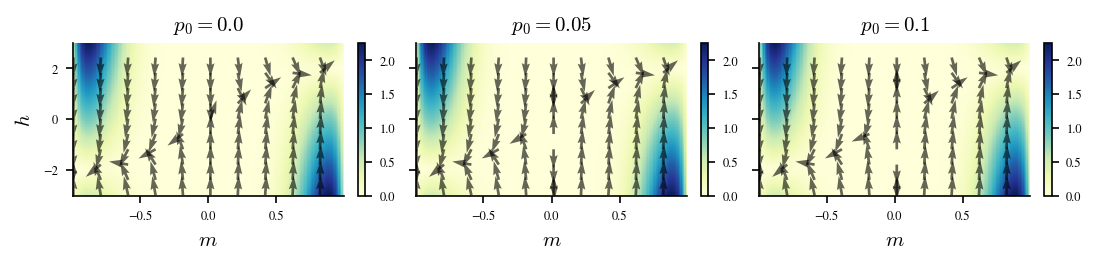

In [98]:
ncols = len(ps)
nrows = 1

width = double_w
figsize = (width, width * 0.23)

cmap = pc_cmaps[0]
set_font_sizes(conf='tight')
a = 20
fig , axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, layout='constrained', sharex=True,sharey='row')

for ip , p in enumerate(ps):
    U , V = data[p]
    ax = axes[ip]
    # ax.set_xlim(-1,1)
    if ip == 0: ax.set_ylabel(r'$h$')
    ax.set_xlabel(r'$m$')
    ax.set_title(rf'$p_0 = {p}$')
    # Compute the magnitude of the velocity
    magnitude = np.sqrt(U**2 + V**2)

    # Normalize vectors to unit length for quiver
    U_unit = U / magnitude
    V_unit = V / magnitude
    c = ax.pcolormesh(M, H, (magnitude), cmap=cmap,alpha=1,vmax=0.1 if ip < -1 else None)
    # if ip == ncols-1: fig.colorbar(c, ax=ax)
    fig.colorbar(c, ax=ax)
   
    # Plot the normalized velocity vectors
    ax.quiver(M[::a,::a], H[::a,::a], U_unit[::a,::a], V_unit[::a,::a], color='black', alpha=0.6,scale=14, width=0.01)

    

# fig.savefig(f'../logs/vectorfields_d{d}_k{k}_teacher_{teacher}_student{student}.png', dpi=300, bbox_inches='tight')


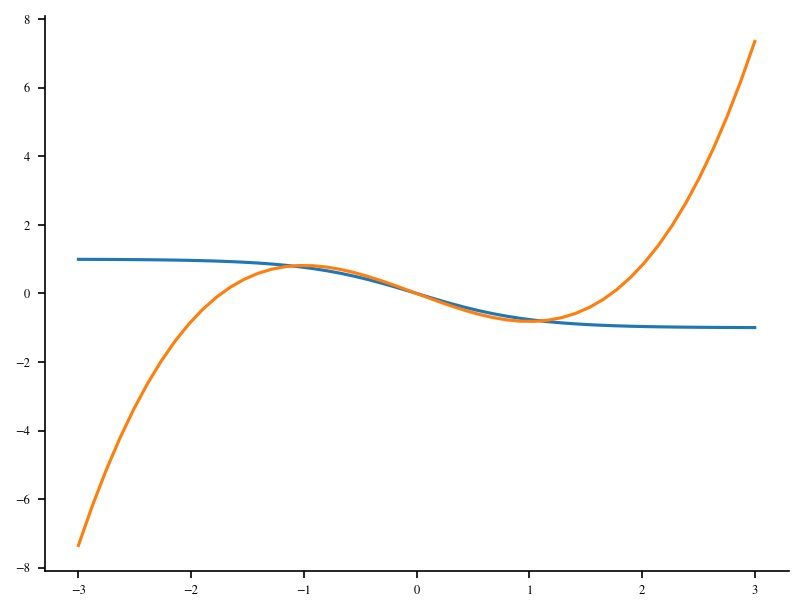

In [209]:
t = np.linspace(-3,3,50)
plt.plot(t,-activations['tanh'][0](t))
plt.plot(t,activations['He3'][0](t))

# Fixed points h

In [363]:
params = {
    'd': 2000,
    'k': 5,
    'tau': 0.01,
    'teacher': 'He5',
    'student': 'tanh',
    'loss': 'corr',
    'c':0.062, #0.15
    'scale': 'linear',
    'h_star': 2.0,
}

d = params['d']
k = params['k']
tau = params['tau']
teacher = params['teacher']
student = params['student']
h_star = params['h_star']


# Create a grid of points

h = np.linspace(-5, 5, 200)
m = np.ones_like(h)*(1/np.sqrt(d))


ps = [0.0 ,0.1 , 0.2]

N_walkers = 7

data = {}
for p in ps:
    params['p'] = p *d**(-0.5*(k-1))
    data[p] = velocity_field(0,[m,h],params)

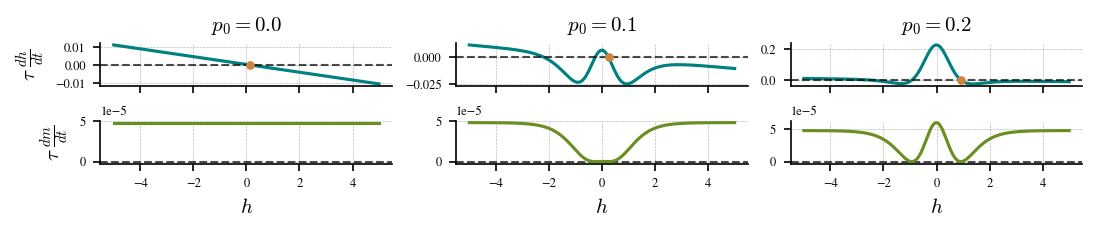

In [364]:
ncols = len(ps)
nrows = 2

width = double_w
figsize = (width, width * 0.1*nrows)

cmap = pc_cmaps[0]
set_font_sizes(conf='tight')

fig , axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, layout='constrained', sharex=True,sharey=False)
vals = []
for ip , p in enumerate(ps):
    ax = axes[0,ip]
    ax.grid(ls='--',c='k',lw=0.3,alpha=0.3)
    dmdt , dhdt = data[p]
    # Plot h
    if ip == 0: ax.set_ylabel(r'$\tau\; \frac{dh}{dt}$',rotation=90,loc='center')
    ax.set_title(rf'$p_0 = {p}$')
    ax.plot(h,(dhdt*d**(k-0.5)*params['tau']/1000),color=pc_colors[0])
    ax.axhline(0,lw=1,alpha=0.7,ls='--',c='k')
    x = dhdt[h>0]
    idx = np.where(x<0)[0][0]
    ax.scatter(h[h>0][idx],x[idx],color=pc_colors[2],s=10,zorder=4)
    vals.append(h[h>0][idx])
    # Plot m
    ax2 = axes[1,ip]
    ax2.axhline(0,lw=1,alpha=0.7,ls='--',c='k')
    ax2.grid(ls='--',c='k',lw=0.3,alpha=0.3)
    if ip == 0: ax2.set_ylabel(r'$\tau\; \frac{dm}{dt}$',rotation=90,loc='center')
    ax2.set_xlabel(r'$h$')
    ax2.plot(h,dmdt*d**(k-0.5)*params['tau']/1000,color=pc_colors[1])



# fig.savefig(f'../logs/fixed_points_d{d}_k{k}_teacher_{teacher}_student{student}.png', dpi=300, bbox_inches='tight')
